# Age of Death

## Data Process

In [1]:
import time

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

RANDOM_STATE = 666666

In [2]:
# Import Data

df = pd.read_csv('outputData.csv', sep=',')
df = df.dropna(subset = ['Age of Death'])
X = df[['Gender', 'Occupation', 'Country', 'Birth Year']]
Y = df['Age of Death']

In [3]:
# LabelEncoder

X_LE = np.zeros((len(X.T), len(X)))
LE = preprocessing.LabelEncoder()
for i in range(len(X.T)):
    LE.fit(X.T.to_numpy()[i])
    X_LE[i] = LE.transform(X.T.to_numpy()[i])
X_LE = X_LE.T

Y_np = Y.to_numpy()
for i in range(10, 110, 5):
    Y_np[np.where((Y_np >= i) & (Y_np < i+5))] = np.array([i for j in range(len(Y_np[np.where((Y_np >= i) & (Y_np < i+5))]))])
Y_np[np.where(Y_np < 10)] = np.array([5 for j in range(len(Y_np[np.where(Y_np < 10)]))])
Y_np[np.where(Y_np >= 115)] = np.array([115 for j in range(len(Y_np[np.where(Y_np >= 115)]))])

In [4]:
# Standzardization

X_S = np.zeros((len(X_LE.T), len(X_LE)))
for i in range(len(X_LE.T)):
    X_S[i] = (X_LE.T[i]-np.min(X_LE.T[i]))/(np.max(X_LE.T[i])-np.min(X_LE.T[i]))
X_S = X_S.T

In [5]:
# Create training and test data sets

x = X_S
y = Y_np.astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = RANDOM_STATE)

## SVM

Loop 1 :
CPU times: total: 1.55 s
Wall time: 1.52 s
CPU times: total: 250 ms
Wall time: 93 ms
CPU times: total: 125 ms
Wall time: 8 ms
Loop 2 :
CPU times: total: 2.56 s
Wall time: 1.27 s
CPU times: total: 125 ms
Wall time: 25 ms
CPU times: total: 125 ms
Wall time: 6 ms
Loop 3 :
CPU times: total: 2.73 s
Wall time: 1.42 s
CPU times: total: 125 ms
Wall time: 24.5 ms
CPU times: total: 125 ms
Wall time: 7 ms
Loop 4 :
CPU times: total: 2.77 s
Wall time: 1.47 s
CPU times: total: 250 ms
Wall time: 28 ms
CPU times: total: 0 ns
Wall time: 7.01 ms
Loop 5 :
CPU times: total: 2.75 s
Wall time: 1.32 s
CPU times: total: 125 ms
Wall time: 26 ms
CPU times: total: 125 ms
Wall time: 6 ms
Loop 6 :
CPU times: total: 2.61 s
Wall time: 1.3 s
CPU times: total: 250 ms
Wall time: 25 ms
CPU times: total: 0 ns
Wall time: 6 ms
Loop 7 :
CPU times: total: 2.88 s
Wall time: 1.45 s
CPU times: total: 125 ms
Wall time: 22 ms
CPU times: total: 125 ms
Wall time: 6 ms
Loop 8 :
CPU times: total: 2.59 s
Wall time: 1.3 s
CPU 

C:\Users\12576\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CPU times: total: 51.6 s
Wall time: 50.2 s
CPU times: total: 250 ms
Wall time: 27 ms
CPU times: total: 0 ns
Wall time: 6 ms
Loop 49 :


C:\Users\12576\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CPU times: total: 48.5 s
Wall time: 47.2 s
CPU times: total: 250 ms
Wall time: 27 ms
CPU times: total: 0 ns
Wall time: 7 ms
Loop 50 :


C:\Users\12576\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CPU times: total: 55.9 s
Wall time: 54.5 s
CPU times: total: 250 ms
Wall time: 26 ms
CPU times: total: 0 ns
Wall time: 6 ms


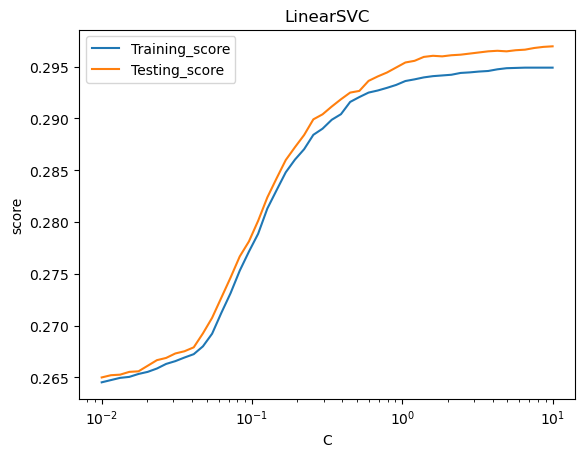

In [6]:
Cs_LinearSVC = np.logspace(-2, 1)
train_scores_LinearSVC = []
test_scores_LinearSVC = []
num = 1
for C in Cs_LinearSVC:
    print('Loop', num, ':')
    num = num + 1
    cls = svm.LinearSVC(C = C)
    %time cls.fit(x_train, y_train)
    %time train_scores_LinearSVC.append(cls.score(x_train, y_train))
    %time test_scores_LinearSVC.append(cls.score(x_test, y_test))

# Plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(Cs_LinearSVC, train_scores_LinearSVC, label='Training_score')
ax.plot(Cs_LinearSVC, test_scores_LinearSVC, label='Testing_score')
ax.set_xlabel(r'C')
ax.set_ylabel(r'score')
ax.set_xscale('log')
ax.set_title('LinearSVC')
ax.legend(loc='best')
plt.show()

In [7]:
# Fitting LinearSVC model

optimise_C = Cs_LinearSVC[test_scores_LinearSVC.index(max(test_scores_LinearSVC))]
print(optimise_C)

linearsvc = svm.LinearSVC(C = optimise_C)
%time linearsvc.fit(x_train, y_train)

# Return the mean accuracy on the given test data and labels.

%time linearsvc_score = linearsvc.score(x_test, y_test)
linearsvc_score

CPU times: total: 45.5 s
Wall time: 45.6 s
CPU times: total: 0 ns
Wall time: 6 ms


C:\Users\12576\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.2969683915782672

## Figure

CPU times: total: 0 ns
Wall time: 6 ms


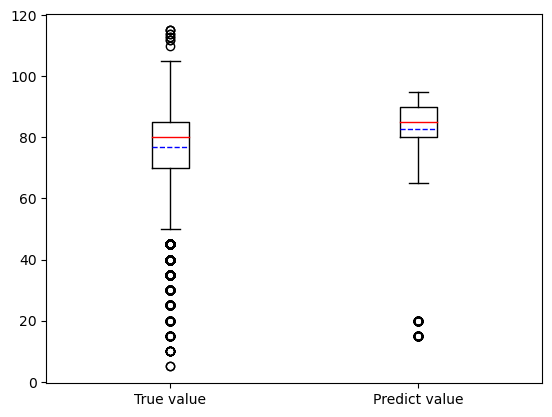

In [8]:
%time pre_linearsvc = linearsvc.predict(x_test)
plt.boxplot([y_test, pre_linearsvc], medianprops = {'color': 'red'}, meanline = True, showmeans = True, meanprops = {'color': 'blue', 'ls': '--'}, labels = {'True value', 'Predict value'})
plt.show()